In [31]:
from fairness.matching import conscious_fairness_through_unawareness
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [37]:
dataset = pd.read_csv('./dataset/adult/adult.data', sep=',')

In [38]:
dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [39]:
columns_to_drop = ['education-num']
protected_attributes = ['sex', 'race', 'relationship', 'native-country']
output_column = 'income'

In [40]:
fair_dataset = conscious_fairness_through_unawareness(dataset, protected_attributes, output_column, columns_to_drop)

unfair


KeyboardInterrupt: 

In [30]:
fair_dataset

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,4,1,0,1,1,2174,0,40,1,0
1,50,6,83311,9,2,4,0,1,1,0,0,13,1,0
2,38,4,215646,11,0,6,0,1,1,0,0,40,1,0
3,53,4,234721,1,2,6,0,0,1,0,0,40,1,0
4,28,4,338409,9,2,10,1,0,0,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,2,13,1,1,0,0,0,38,1,0
32557,40,4,154374,11,2,7,0,1,1,0,0,40,1,1
32558,58,4,151910,11,6,1,1,1,0,0,0,40,1,0
32559,22,4,201490,11,4,1,1,1,1,0,0,20,1,0


In [7]:
output_column = "income"

In [8]:
X = fair_dataset.iloc[:,:len(fair_dataset.columns) - 2]
y = fair_dataset.loc[:, output_column:]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
standard_scaler_train = StandardScaler()
X_train = standard_scaler_train.fit_transform(X_train)

standard_scaler_test = StandardScaler()
X_test = standard_scaler_test.fit_transform(X_test)

In [11]:
pca = PCA(n_components=0.85)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [12]:
estimator = RandomForestClassifier()

parameters =  {
    'min_samples_leaf': [5, 7, 9, 11],
    'max_depth' : [10, 20, 50, 80, 100, 150],
    'criterion' :['gini', 'entropy']
}

In [13]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='accuracy', 
    return_train_score=True,
    cv=3
)

In [14]:
grid_search_classifier = grid_search.fit(X_train, y_train)

/home/antonio/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [ ]:
y_pred = grid_search_classifier.predict(X_test)

In [ ]:
print("Accuracy score on Test set: ", accuracy_score(y_test, y_pred))
print("Accuracy score on Train set: ", accuracy_score(y_train, grid_search_classifier.predict(X_train)))
print(classification_report(y_test, y_pred))

Accuracy score on Test set:  0.8398587440503608
Accuracy score on Train set:  0.9470208845208845
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4942
           1       0.74      0.52      0.61      1571

    accuracy                           0.84      6513
   macro avg       0.80      0.73      0.75      6513
weighted avg       0.83      0.84      0.83      6513



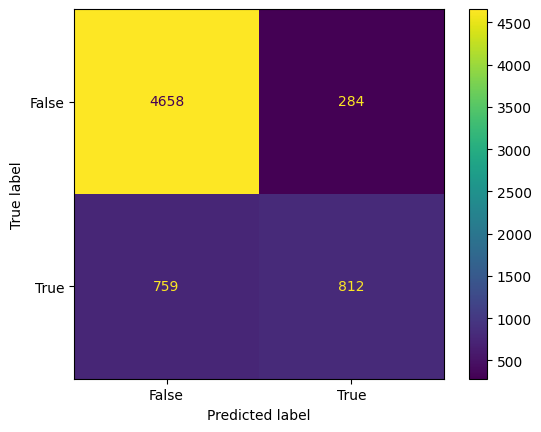

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[False, True])
cm_display.plot()
plt.show()